# Preprocessing / dry analysis

Libraries

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

AttributeError: module 'numpy' has no attribute 'round'

using current working directory for file loc

In [ ]:
pwd = os.getcwd()
filepath = os.path.join(pwd, 'housing.csv')
filepath

'/Users/chiragdevgade/Documents/Data-Analytics-Case-Studies/c2homl-houseprice-da-s-210623/housing.csv'

In [ ]:
housing_Data = pd.read_csv('housing.csv')
housing_Data.head()
# print(housing_Data) dont do this

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**.info** for entries, null stat, dtypes

In [ ]:
housing_Data.info() # basic info of entries, null status, dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**.values_counts()** count of entities

In [ ]:
housing_Data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Visualizing the whole data in his   

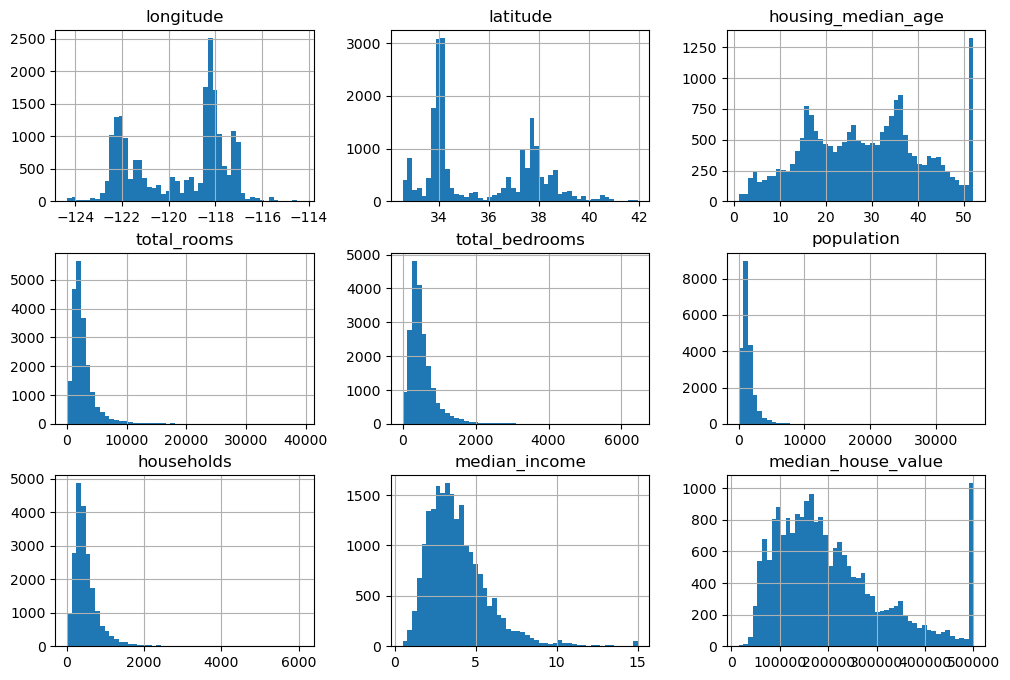

In [ ]:
import matplotlib.pyplot as plt

housing_Data.hist(bins=50, figsize=(12, 8)) # bins = size of one hist
plt.show()

# bin 50

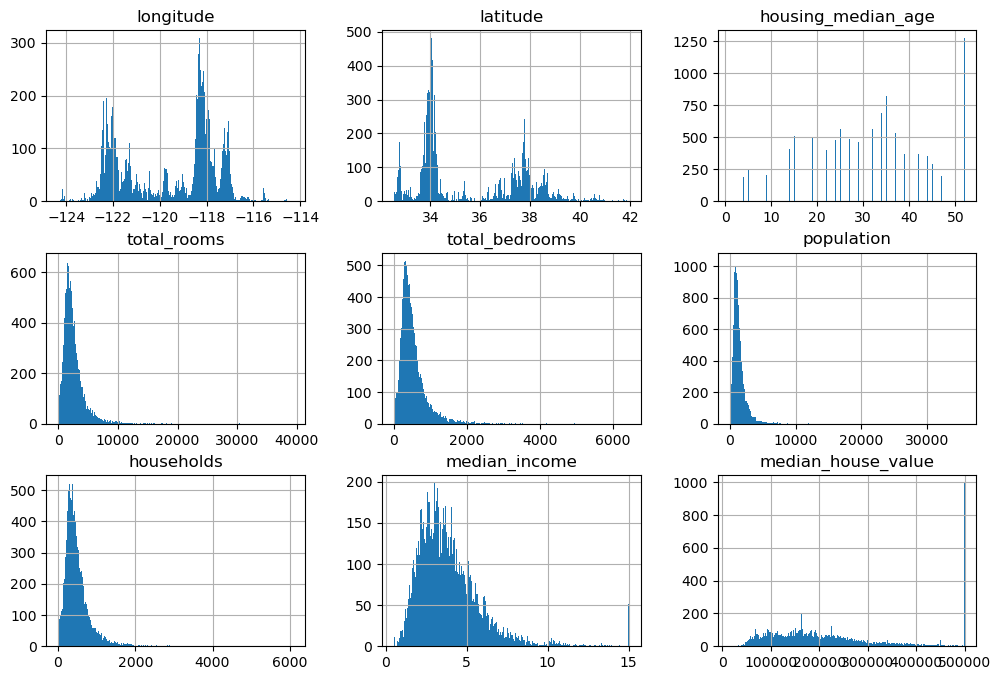

In [ ]:
housing_Data.hist(bins=500, figsize=(12, 8)) # bins = size of one hist
plt.show()

# bin 500

Visualizing the data using .plot() <bar = vertical bar> <barh = horizontal bar>

<Axes: >

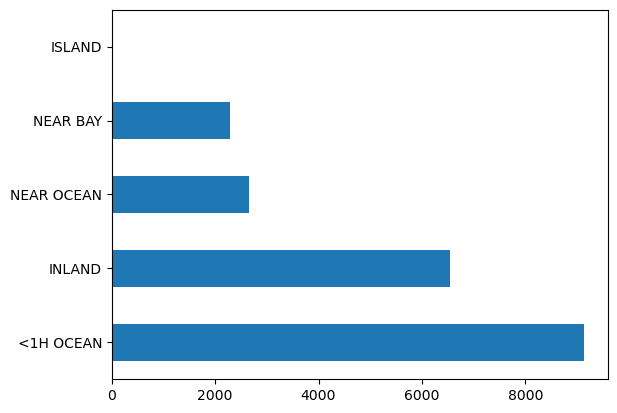

In [ ]:
housing_Data['ocean_proximity'].value_counts().plot(kind = 'barh') # vertical are better than horizontal <but can use horizontal bar>

<Axes: >

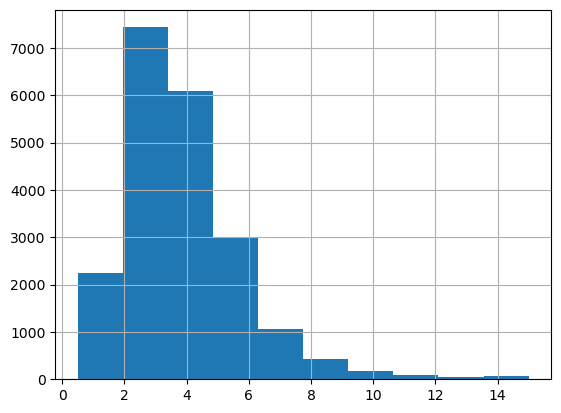

In [ ]:
housing_Data['median_income'].hist()

In [ ]:
housing_Data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


**.cut()** function to create an income category attribute with five categories (labeled from 1 to 5); category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:

In [ ]:
housing_Data["income_cat"] = pd.cut(housing_Data["median_income"],
                                   bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])

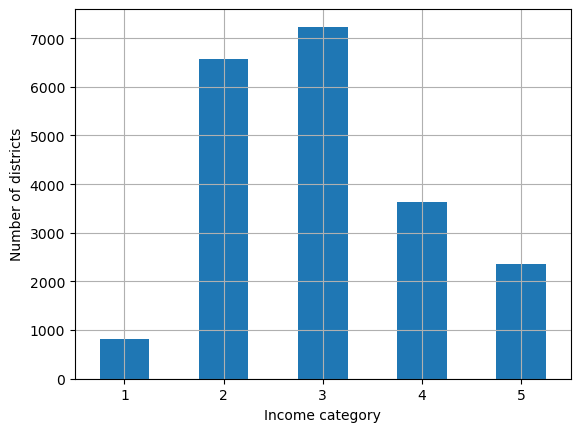

In [ ]:
housing_Data["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True) 
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

### basis for ml begins
(median_house_value) <- predict (y)
(-----) <- predictors (x) all except median_house_value

In [ ]:
y = housing_Data['median_house_value'] # predict this 
X = housing_Data.drop('median_house_value', axis = 1) # dropping y col from dataset

X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3


## Split Dataset 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # 33% data for test remaining for train 
X_train # author geron uses 33% for test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
19249,-122.74,38.46,9.0,2268.0,594.0,1311.0,585.0,2.6607,<1H OCEAN,2
7752,-118.15,33.92,30.0,915.0,234.0,646.0,211.0,2.5208,<1H OCEAN,2
17148,-122.20,37.43,38.0,3626.0,528.0,1350.0,532.0,7.3681,NEAR OCEAN,5
19739,-122.23,40.32,10.0,2336.0,426.0,1003.0,368.0,3.0833,INLAND,3
10382,-117.65,33.62,15.0,2708.0,410.0,1140.0,389.0,6.2899,<1H OCEAN,5
...,...,...,...,...,...,...,...,...,...,...
15720,-122.45,37.78,52.0,1345.0,291.0,560.0,294.0,3.7159,NEAR BAY,3
15696,-122.45,37.79,52.0,1734.0,482.0,731.0,429.0,1.4804,NEAR BAY,1
10957,-117.88,33.75,34.0,3004.0,673.0,5477.0,640.0,2.8342,<1H OCEAN,2
10245,-117.86,33.90,25.0,3205.0,409.0,1291.0,408.0,7.2478,<1H OCEAN,5


**Above trained data gave us 13k rows instead of total 20k, as 67% is used for training rest is for test**

Actual Data hist

<Axes: >

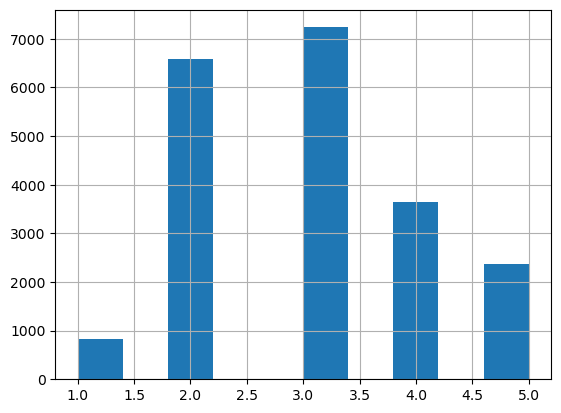

In [ ]:
housing_Data['income_cat'].hist()

Trained Data hist

<Axes: >

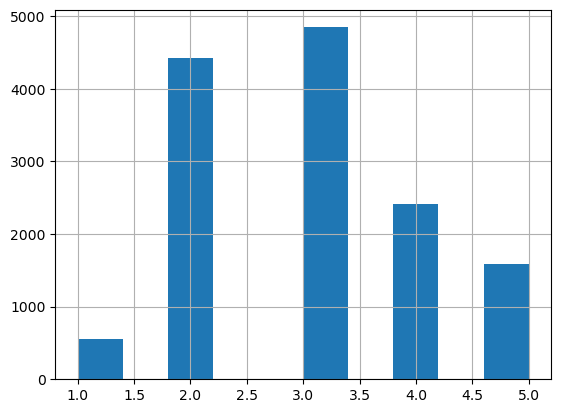

In [ ]:
X_train['income_cat'].hist()

In case the **TRAIN TEST SPLIT** training data doesnt look similar to the original data then we can use the **StratifiedShuffleSplit**  

## Stratified Split

In [ ]:
# StratifiedShuffleSplit
# just copy paste and understand the logic no need to remember the code

from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42) # here 20% test
strat_splits = []
for train_index, test_index in splitter.split(housing_Data, housing_Data["income_cat"]):
        strat_train_set_n = housing_Data.iloc[train_index]
        strat_test_set_n = housing_Data.iloc[test_index]
        strat_splits.append([strat_train_set_n, strat_test_set_n])

In [ ]:
strat_train_set, strat_test_set = train_test_split(
housing_Data, test_size=0.2, stratify=housing_Data["income_cat"], random_state=42)

the income category proportions in the **original** dataset

In [ ]:
housing_Data['income_cat'].value_counts() / len(housing_Data)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

the income category proportions in the **train** set

In [ ]:
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

Now comparing the tests of random split, stratified split the og data

In [ ]:
def income_cat_proportions(data):
    return data ["income_cat"].value_counts () / len(data)
train_set, test_set = train_test_split (housing_Data, test_size=0.2, random_state=42)
    
compare_props = pd. DataFrame ({
    "Overall": income_cat_proportions (housing_Data),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()

compare_props["Rand. %error"] = 100 * compare_props ["Random"] / compare_props ["Overall"] - 100
compare_props ["Strat. %error"] = 100 * compare_props ["Stratified"] / compare_props ["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


Stratified is more accurate with less %error

### **Why visualizing is important** ***anscombe***

https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html

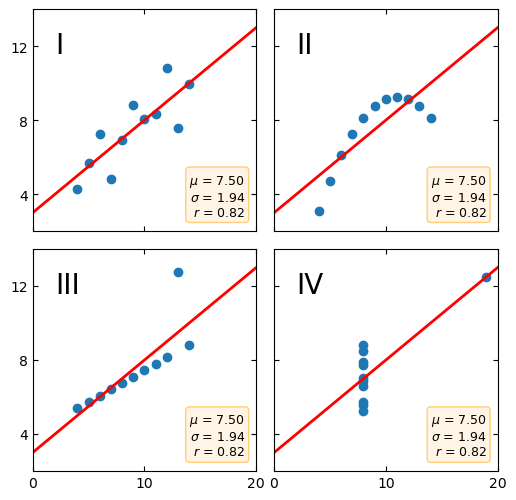

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x, y, 'o')

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color='r', lw=2)

    # add text box for the statistics
    stats = (f'$\\mu$ = {np.mean(y):.2f}\n'
             f'$\\sigma$ = {np.std(y):.2f}\n'
             f'$r$ = {np.corrcoef(x, y)[0][1]:.2f}')
    bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
    ax.text(0.95, 0.07, stats, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')

plt.show()

Same mean, median, mode but diff graph

# Visualizing the data

### Using Stratified train and test

In [ ]:
strat_train_set.drop("income_cat", axis="columns", inplace=True) 
strat_test_set.drop("income_cat", axis="columns", inplace=True)

In [ ]:
housing = strat_train_set.copy() # copy of train for backup
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

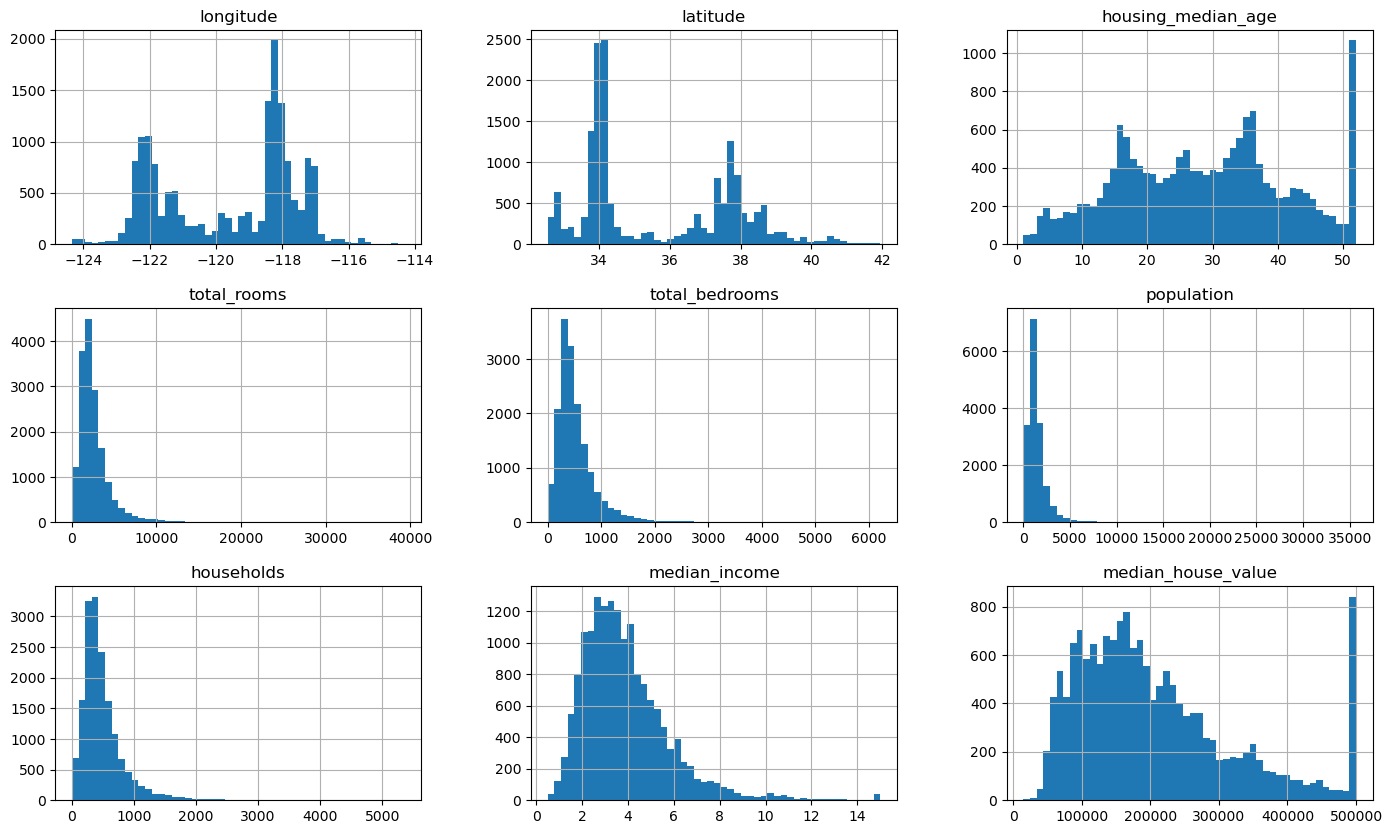

In [ ]:
housing.hist(bins = 50, figsize=(17, 10))

above is from the training from stratified

<Axes: >

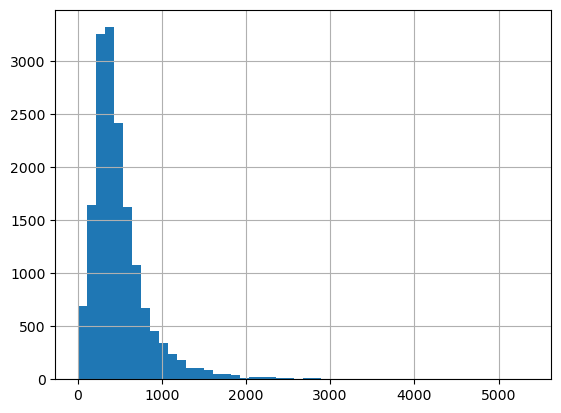

In [ ]:
housing['households'].hist(bins = 50)

<Axes: >

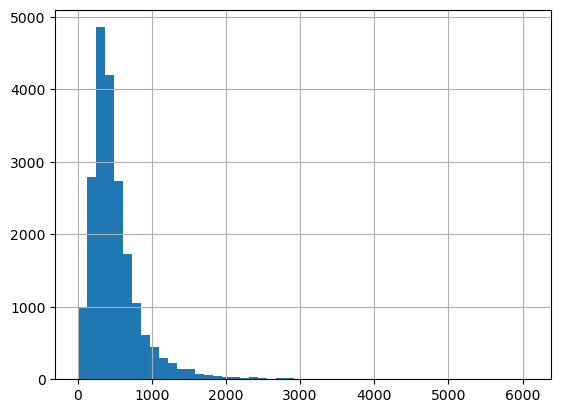

In [ ]:
housing_Data['households'].hist(bins = 50)

## Geographic Data

without density

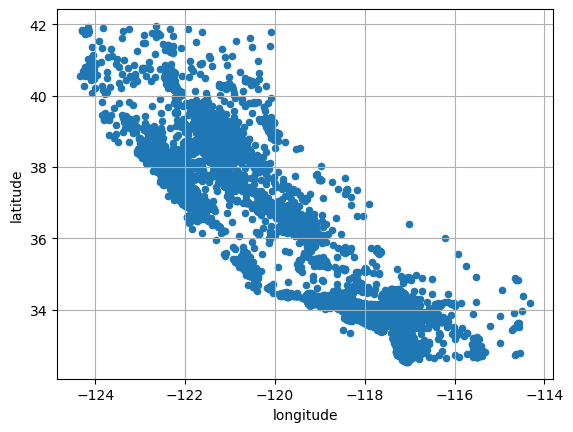

In [ ]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True)
plt.show()

**aplha** with density

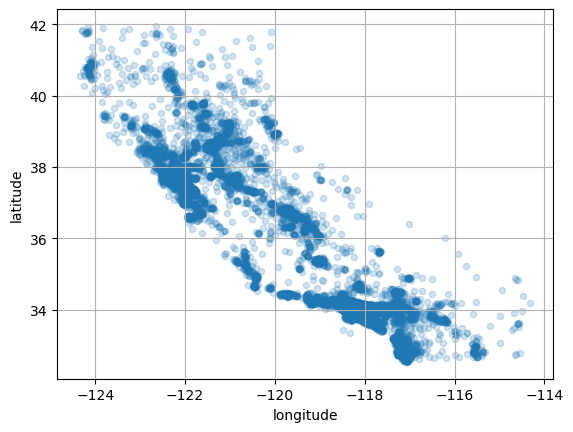

In [ ]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show()

Detailed Geographic plot with labels

- kind - Type of plot
- x - col on x axis
- y - col on y axis
- gird - Grid true false
- s - marked col's density (per 100 per 1000 per 10000)
- label - :name: legend
- legend - to show label True False 
- c - specify the col used for colour scheme of s
- cmap - colour scheme of markers (jet, plasma, viridis, magma, inferno, cividis)
- colorbar - True False
- sharex - whether x axis is true with other plots (no clue as of now)
- figsize - size of plot

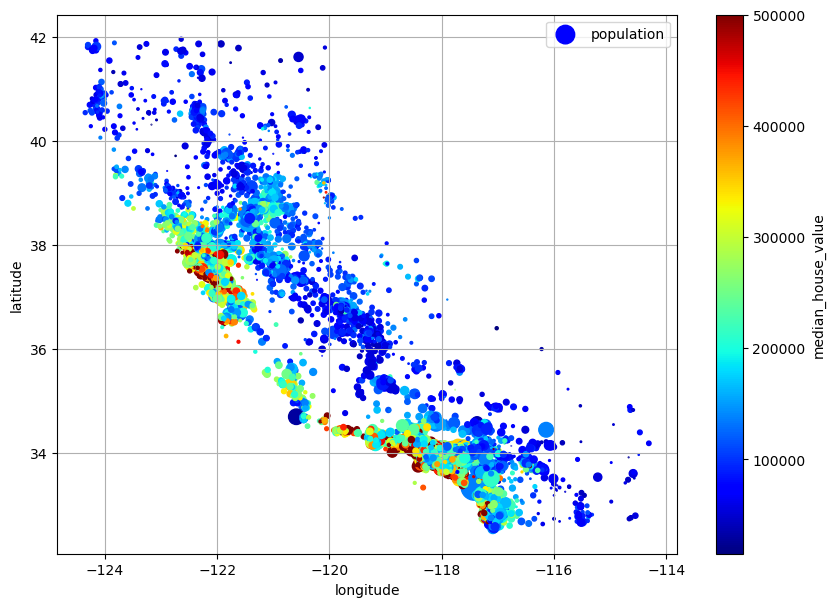

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, s=housing["population"] / 100, label="population", c="median_house_value", cmap='jet', colorbar=True,
legend=True, sharex = True, figsize=(10, 7))
plt.show()

# map of california

# Correlation Matrices

In [ ]:
# of train data of stratified

housing.corr()

/var/folders/kz/zfvfw74965qd387n38yh57kh0000gn/T/ipykernel_37784/2830524117.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


/var/folders/kz/zfvfw74965qd387n38yh57kh0000gn/T/ipykernel_37784/237850588.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = housing.corr()


<Axes: >

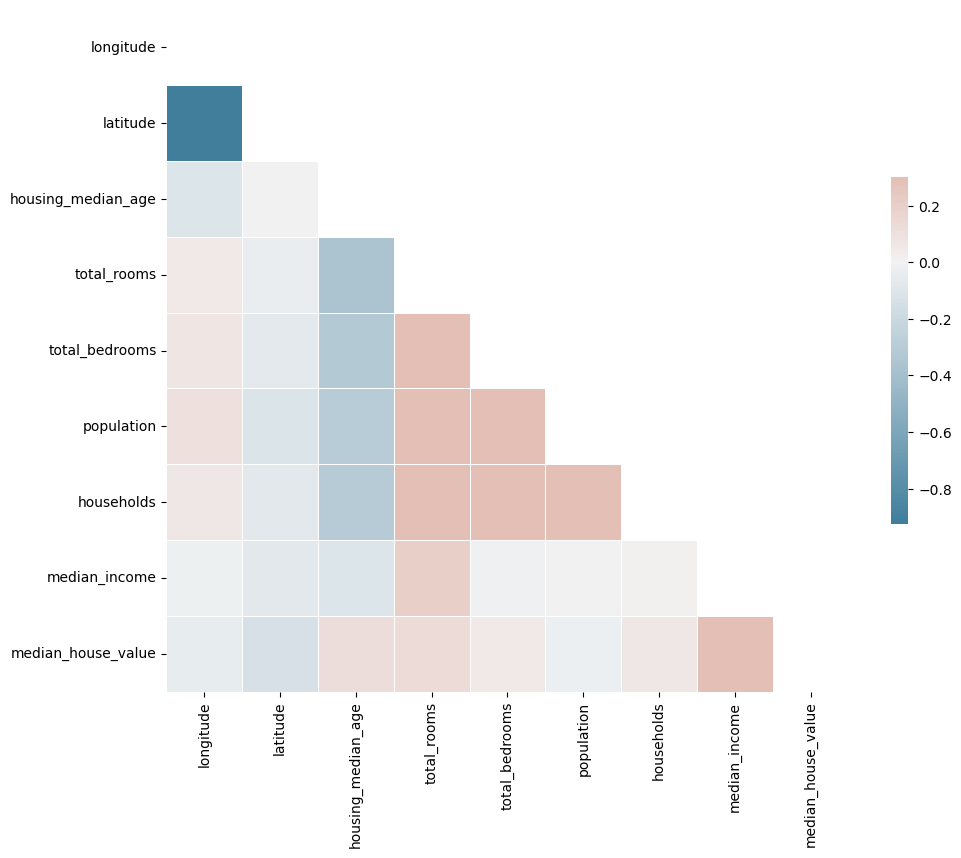

In [ ]:
corr = housing.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = .3, center = 0,
            square = True, linewidth = .5, cbar_kws = {"shrink": .5})

# Encoding and getting ready for ML

Data preparation is oftenitimes the most time-consuming step of the modeling process. It is also one of the most important with model accuracy often contingent on the quality of data inserted. To this end, we'll be applying the following transformations on this data, not in this particular order:
- **Imputation**: Inserting values where they might be missing to have a complete dataset
- **Feature Engineering**: Creating new features (columns) out of our raw data using domain knowledge
- **Encoding Categorical Variables**: Transforming categorical variables into some numerical variation
 - **Scaling**: Aoolving a scaler that transforms all of our data on the same numerical scale

In [ ]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

 ### Dealing with missing values

In [ ]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [ ]:
incomp = housing[housing.isnull().any(axis = 1)]
incomp

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,NaN,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,NaN,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,NaN,3477.0,1537.0,3.0546,NEAR OCEAN


In [ ]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

1. Dropping the rows

In [ ]:
incomp.dropna(subset=['total_bedrooms']) 


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


2. Dropping the columns

In [ ]:
incomp.drop('total_bedrooms', axis=1) 

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,3477.0,1537.0,3.0546,NEAR OCEAN


3. Imputation

In [ ]:
# median imputation

median = housing['total_bedrooms'].median() # 433
incomp['total_bedrooms'].fillna(median, inplace = True)
incomp

/var/folders/kz/zfvfw74965qd387n38yh57kh0000gn/T/ipykernel_37784/3833701594.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incomp['total_bedrooms'].fillna(median, inplace = True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
1350,-121.95,38.03,5.0,5526.0,433.0,3207.0,1012.0,4.0767,INLAND
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,<1H OCEAN
9149,-118.50,34.46,17.0,10267.0,433.0,4956.0,1483.0,5.5061,<1H OCEAN
16757,-122.48,37.70,33.0,4492.0,433.0,3477.0,1537.0,3.0546,NEAR OCEAN


### Using imputer from sklearn

Numerical Data

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# removing categorical columns
housing_num = housing.select_dtypes(include=[np.number])
# housing_num = housing.drop(columns='ocean_proximity')


In [ ]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [ ]:
housing_num.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
dtype: int64

In [ ]:
# always fit transform before imputing
# imputed_Data = imputer.fit_transform('housing_num')

"""ERROR with IMPUTER: instead of using the imputer method lets go fillna"""

'ERROR with IMPUTER: instead of using the imputer method lets go fillna'

In [ ]:
housing_num = housing_num.fillna(median)
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


### Encoding Categorical variables

In [ ]:
housing_cat1 = housing['ocean_proximity']
housing_cat1 = np.array(housing_cat1).reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
housing_cat1_enc = encoder.fit_transform(housing_cat1)

print(housing_cat1_enc)

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


/Users/chiragdevgade/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Feature Engineering

**Pipeline**

Pipelines are a feature built into sklearn that allow us to easily apply a number of transformations one after another. There is a little bit of complexity associated with them that leads me to exclude them in this chapter; We will most likely go over them in another chapter.
Instead we'll just create our own version of a pipeline using a normal
Python function.

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set ["median_house_value"].copy ()
def data_transformations (data):
    ### Separate Labels if they Exist ###
    if "median_house_value" in data. columns:
        labels = data ['median_house_value']
        data = data.drop("median_house_value", axis=1)
    else:
        labels = None
        
    ### Feature Engineering ###
    feature_engineered_data = feature_engineering(data)
    features = list(feature_engineered_data.columns) 
# Creating a list of our features for future use

    ### Imputing Data ### from sklearn.impute import SimpleImputer
    imputer = SimpleImputer (strategy="median")
    housing_num = feature_engineered_data.select_dtypes(include= [np.number])
    imputed = imputer. fit_transform (housing_num)
    
    ### Encoding Categorical Data ###
    housing_cat = feature_engineered_data.select_dtypes(exclude= [np.number])
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder (sparse=False)
    housing_cat_1hot = cat_encoder.fit_transform (housing_cat)
    features = features + cat_encoder.categories_[0].tolist ()
    features.remove("ocean_proximity") 
# We're encoding this variable, so we don't need it in our list anymore

    ### Scaling Numerical Data ###
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    
    housing_scaled = scaler.fit_transform(imputed)
    
    ### Concatening all Data ###
    output = np.hstack([housing_scaled, housing_cat_1hot])
    
    return output, labels, features

# ML begins